# **Library Deep Learning**

**1.   Tensorflow**
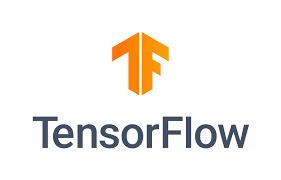

Tensorflow adalah library yang dikembangkan oleh google dan merupakan salah satu library yang paling populer serta banyak digunakan untuk mengembangkan dan menerapkan Machine Learning dan algoritma lain yang memiliki banyak operasi matematika untuk dilakukan.

Google meluncurkan TensorFlow untuk memperkenalkan ekosistem yang menyediakan kumpulan alur kerja untuk mengembangkan dan melatih model, untuk mengimplementasikan Machine Learning di hampir semua aplikasi. Sebenarnya, kita semua menggunakan TensorFlow begitu sering tanpa menyadari bahwa penggunaannya: Google Foto atau Google voice, kamu menggunakan model TensorFlow secara tidak langsung, model tersebut bekerja pada kelompok besar perangkat keras Google dan sangat kuat dalam tugas perseptual.

Data untuk Machine Learning umumnya membutuhkan komputasi dalam beberapa bentuk dan oleh karena itu, kita sering melihat representasi data dilakukan secara numerik. Untuk mendefinisikan tensor: wadah yang dapat menampung data dalam dimensi N.
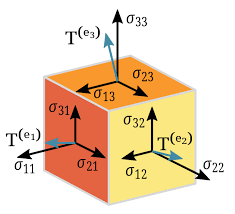

Singkatnya, tensor adalah objek matematika yang digunakan untuk mendeskripsikan properti fisik seperti skalar dan vektor. Pada dasarnya, tensor hanyalah sebuah generalisasi dari skalar dan vektor; skalar adalah tensor peringkat-nol, sedangkan vektor adalah tensor peringkat pertama. Anda dapat menentukan peringkat tensor dengan jumlah arah yang diperlukan untuk mewakilinya. Itu juga ditandai dengan dimensi array. 

**2.   Keras**

Keras merupakan library Machine Learning open source berbasis Python, dikembangkan untuk membuat penerapan model pembelajaran yang mendalam secepat dan semudah mungkin untuk penelitian serta pengembangan yang dirilis berdasarkan lisensi MIT. Library Keras menyediakan metode yang nyaman untuk membuat berbagai model pembelajaran mendalam di atas Theano atau TensorFlow. Keras berfokus pada prinsip-prinsip utamanya yang mencakup dalam pembuatan prototipe dari neural network, kemudahan penggunaan, modularitas, dan ekstensibilitas yang mudah dengan Python.


Layer adalah dasar blok pada neural network. Layer mengandung sebuah tensor-tensor. setiap layer akan menerima informasi. output dari satu layer akan mengalir ke layer berikutnya sebagai input.

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

Modul zipfile merupakan pustaka standar untuk memanipulasi zip. sedangkan os adalah modul dimana kita dapat berinteraksi dengan sistem operasi seperti mengubah,menghapus, membuat direktori dan lain-lain.

link file **messy-vs-clean-room.zip** disimpan pada drive. kemudian link tersebut kita inisiasi pada variabel local_zip.

In [5]:
import zipfile, os
local_zip = '/content/drive/MyDrive/dataset/messy-vs-clean-room.zip'

method **ZipFile(local_zip, 'r')** akan mengeksekusi local_zip dengan mode read atau membaca file tanpa mengubah file tersebut. Kemudian semua file akan diekstrak pada folder /tmp dan aksesnya ditutup agar menjaga keamanan. 

In [6]:
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


Kemudian kita membuat sebuah base_dir sebagai direktori dasar. **os.path.join()** bertujuan menggabubgkan dua direktori, misalnya folder train digabung pada base_dir sehingga nama path menjadi **/tmp/images/train** dan **/tmp/image/val**.

In [7]:
base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

listdir bertujuan menampilkan list folder pada direktori train_dir dan validation_dir.

In [8]:
os.listdir(train_dir)
os.listdir(validation_dir)

['clean', 'messy']

Membagi file menjadi 4 bagian

In [9]:
train_clean = "/tmp/images/train/clean"
train_messy = "/tmp/images/train/messy"
test_messy = "/tmp/images/val/messy"
test_clean = "/tmp/images/val/clean"

fungsi len() akan memeriksa banyak file dari direktori train_clean dan train_messy sehingga memperoleh hasil dari training 192 dan testing 20 file.

In [10]:
print("Number of training images: {}".format(len(os.listdir(train_clean))+len(os.listdir(train_messy))))
print("Number of test images: {}".format(len(os.listdir(test_clean))+len(os.listdir(test_messy))))

Number of training images: 192
Number of test images: 20


ImageDataGenerator merupakan proses augmentasi gambar. Augmentasi memiliki fitur seperti rotasi, shift, standarlization, shift, flip dan lainya.

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Parameter rescale bertujuan mengalikan setiap piksel pada pemrosesan gambar. Pada gambar grayscale 8 bits setiap gambar digital di formasikan dari range 0-255. 0 adalah hitam dan 255 adalah putih. resclae 1./255 akan mengubah gambar dari range [0,255] menjadi [0,1]. Tanpa proses scaling gambar dengan rentang piksel tinggi akan sangat menentukan cara memperbarui bobot. Misalnya, gambar kucing hitam/putih dapat memiliki rentang piksel yang lebih tinggi daripada gambar kucing hitam murni, tetapi itu tidak berarti bahwa gambar kucing hitam/putih lebih penting untuk pelatihan..

**rotation_range** bertujuan untuk memutar secara random gambar dari sudut -20 sampai 20 derajat. 

**horizontal_flip** bertujuan membalik gambar

**shear_range** bertujuan menggeser sudut berlawanan arah jarum jam
. nilai 20 yang artinya persentasi gambar.

**fill_mode** merupakan Poin di luar batas input diisi sesuai dengan mode yang diberikan

In [12]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

test_datagen merupakan imagedatagenerator untuk data testing.

In [13]:
test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

**flow_from_directory** adalah untuk membaca gambar dari numpy array berukuran besar dan folder mengandung gambar.

train_dir merupakan direktori data latih
target_size mengubah resolusi gambar menjadi 150x150

Batch Size adalah jumlah sampel data yang disebarkan ke Neural Network. Contoh: jika kita mempunyai 100 dataset dan batch size kita adalah 5 maka algoritma ini akan menggunakan 5 sempel data pertama dari 100 data yang kita miliki (ke1, ke2, ke3, ke4, dan ke5) lalu disebarkankan atau ditraining oleh Neural Network sampai selesai kemudian mengambil kembali 5 sampel data kedua dari 100 data (ke6, ke7, ke8, ke9, dan ke10), dan begitu seterusnya sampai 5 sampel data ke 20 (100⁄5=20).

karena kita menggunakan 2 class yaitu messy dan clean maka kita menggunakan class_mode binary. 

In [14]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=4,
    class_mode='binary'
)

Found 192 images belonging to 2 classes.


Parameter yang sama yang kita gunakan seperti pada program diatas, tetapi perbedaanya adalah variabel **train_datagen** diganti dengan **test_datagen**.

In [15]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=4,
    class_mode='binary'
)

Found 20 images belonging to 2 classes.


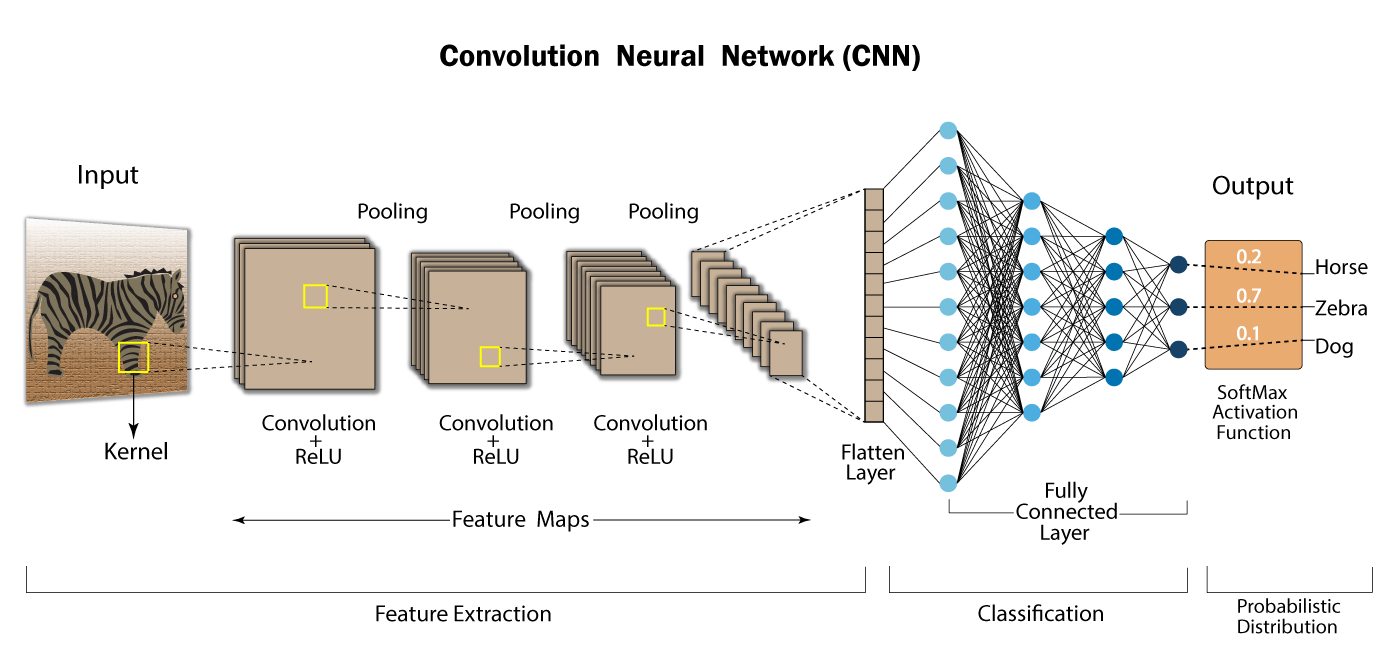

Model CNN hampir mirip dengan MLP tetapi yang membedakan adalah 4 layer konvulsi dan maxpooling. fungsi dari layer konvolusi adalah untuk mengekstraksi atribut pada gambar. Sedangkan layer max pooling berguna untuk mereduksi resolusi gambar sehingga proses pelatihan model lebih cepat.

Pada model CNN, proses klasifikasi gambar hanya berfokus pada atribut-atribut unik yang membedakan tiap kategori. Sehingga, teknik ini dinilai lebih optimal dibandingkan hanya menggunakan model MLP yang membedakan tiap kategori dengan melihat keseluruhan piksel-piksel pada gambar.

tetapi yang menjadi kelemahan CNN adalah setiap epoch pada CNN lebih lama dibandingkan MLP. tetapi untuk hasilnya kurang lebih sama, tapi untuk kasus dataset lain hasil dari CNN perlu dipertimbangkan.

**Sequential** yang dimaksud disini adalah tumpukan layer biasa dimana setiap layer diisi dengan **satu input tensor** dan **satu output tensor**. Tahap ini adalah pembuatan CNN dimana pada layer diberikan Conv2D dan MaxPooling2D.

**input_shape(150,150,3)** merupakan resolusi ambar sebelumnya yang berukuran 150x150 pixel dengan 3 channel.

**Conv2D** merupakan 2D Convolution Layer, lapisan ini menciptakan kernel konvulsi yang membantu mnghasilkan tensor output. Parameter **32** merupakan jumlah filter yang akan dipelajari. Paramter **(3,3)** merupakan ukuran dari kernel.

**kernel** merupakan kernel image processing adalah matriks atau topeng konvolusi yang dapat digunakan untuk mengaburkan, mempertajam, embossing, deteksi tepi, dan banyak lagi dengan melakukan konvolusi antara kernel dan gambar.

**MaxPooling2D()** merupakan fitur yang akan memilih elemen yang paling signifikan dari feature map. fitur tersebut akan disimpan pada lapisan gabungan yang digunakan.

**relu** merupakan fungsi aktivasi dimana ketka inputannya positif otomatif mengembalikan nilai tersebut secara lansung, dan sebaliknya untuk input negatif.

**Dense(512)** akan menghasilkan 512 output.

**sigmoid** adalah fungsi aktivasi yang akan mengubah ke dalam sebuah nilai 0 dan 1.

In [16]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512,activation='relu'),
        tf.keras.layers.Dense(1,activation='sigmoid')

])

Berdasarkan hasil summary di atas, model yang kita buat terdiri dari empat lapis Convolutional dan MaxPoling layer, sebuah flatten layer, serta dua buah dense layer. Ingatlah bahwa dense layer terakhir merupakan output layer. Pada kasus klasifikasi biner, output model merupakan angka tunggal antara 0 dan 1. Sehingga, kita set dense layer terakhir = 1. Sementara itu, kolom “Param #” berisi informasi mengenai jumlah parameter pada tiap layer.

Selanjutnya, kolom “Output Shape” berisi informasi ukuran output yang dihasilkan tiap layer. Jika diperhatikan, ukuran input gambar yang telah didefinisikan sebelumnya adalah sebesar (150, 150). Tapi pada convolutional layer pertama, setiap satu input gambar akan menghasilkan ukuran output (148, 148) sebanyak 32 gambar. Ukuran tersebut berkurang karena kita menggunakan filter dengan ukuran (3, 3) dengan jumlah filter sebanyak 32 filter. Sehingga, tiap satu input gambar akan menghasilkan 32 gambar baru dengan ukuran (148, 148). 

Kemudian, resolusi tiap gambar akan diperkecil dengan tetap mempertahankan informasi pada gambar menggunakan MaxPoling layer yang berukuran (2, 2). Hal ini  akan menghasilkan ukuran output gambar sebesar (74, 74). Nah, proses tersebut juga berlaku untuk Convolutional dan MaxPoling layer yang lain. 

Output dari MaxPoling layer terakhir yang terdiri dari 512 gambar dengan ukuran (7, 7) akan diubah ke dalam bentuk array 1D (tensor 1D). Hal ini  akan menghasilkan output berukuran (25088). 

Nah, output tersebut kemudian masuk ke dalam dense layer pertama yang memiliki 512 neuron. Sehingga, ia akan menghasilkan output dengan ukuran (512). Selanjutnya, output ini akan masuk pada dense layer kedua yang memiliki 1 neuron sehingga akan menghasilkan output dengan ukuran (1). Output dari layer terakhir inilah yang digunakan sebagai hasil akhir model untuk kasus klasifikasi biner.

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

Setelah membuat arsitektur model CNN, tahap selanjutnya adalah melakukan compile model tersebut menggunakan fungsi compile(). Pada tahap ini, kita juga menentukan loss function serta optimizer yang akan digunakan. Loss function yang digunakan pada kasus klasifikasi biner adalah "binary_crossentropy". Selain itu, optimizer yang digunakan  pada kasus ini adalah "Adam optimizer". Adam optimizer dipilih karena mudah diterapkan, lebih efisien secara komputasi dan kebutuhan memori yang lebih kecil.

In [18]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

Tahap terakhir dari pembuatan model adalah proses yang disebut sebagai model fitting. Ia merupakan proses untuk melatih model pada data masukan dan label yang bersesuaian. Pada proses ini, kita memasukkan data latih pada jaringan Neural Network yang telah kita buat sebelumnya. 

Hal yang harus didefinisikan pada tahap ini adalah loss function dan optimizer. Kemudian, kita mulai proses pelatihan model dengan memanggil fungsi fit(). 

Dengan menggunakan ImageDataGenerator, kita tidak perlu memasukkan parameter gambar dan labelnya. Image data generator secara otomatis melabeli gambar sesuai dengan direktorinya. Sebagai contoh,  sebuah gambar yang terdapat di direktori clean, akan diberi label “clean” oleh ImageDataGenerator secara otomatis.

Data yang akan diuji adalah train_generator dimana epochnya sebanyak 20. Jika kita memperhatikan accuracy yang mencapai diatas 0.55 pertanda bahwa accuracy berjalan dengan baik. 

In [21]:
history = model.fit(train_generator, steps_per_epoch=25, epochs=20,
          validation_data=validation_generator,
          validation_steps=5,
          verbose=2)

Epoch 1/20
25/25 - 9s - loss: 0.7248 - accuracy: 0.4800 - val_loss: 0.6569 - val_accuracy: 0.5500 - 9s/epoch - 366ms/step
Epoch 2/20
25/25 - 7s - loss: 0.7039 - accuracy: 0.6300 - val_loss: 0.6636 - val_accuracy: 0.6000 - 7s/epoch - 261ms/step
Epoch 3/20
25/25 - 7s - loss: 0.6161 - accuracy: 0.6700 - val_loss: 0.5181 - val_accuracy: 0.7500 - 7s/epoch - 260ms/step
Epoch 4/20
25/25 - 9s - loss: 0.5389 - accuracy: 0.7700 - val_loss: 0.5177 - val_accuracy: 0.7000 - 9s/epoch - 358ms/step
Epoch 5/20
25/25 - 6s - loss: 0.6374 - accuracy: 0.7100 - val_loss: 0.5409 - val_accuracy: 0.7500 - 6s/epoch - 259ms/step
Epoch 6/20
25/25 - 7s - loss: 0.5805 - accuracy: 0.7500 - val_loss: 0.5254 - val_accuracy: 0.7500 - 7s/epoch - 260ms/step
Epoch 7/20
25/25 - 6s - loss: 0.5551 - accuracy: 0.7300 - val_loss: 0.4601 - val_accuracy: 0.8000 - 6s/epoch - 260ms/step
Epoch 8/20
25/25 - 7s - loss: 0.5752 - accuracy: 0.7100 - val_loss: 0.4635 - val_accuracy: 0.8500 - 7s/epoch - 277ms/step
Epoch 9/20
25/25 - 7s - 

Pada tahap ini kita memvisualisasikan hasil dari fit model. variebel dibagi menjadi 4 bagian yaitu acc(accuracy), val_acc(validation accuracy), loss, dan val_loss(validation loss). Seh

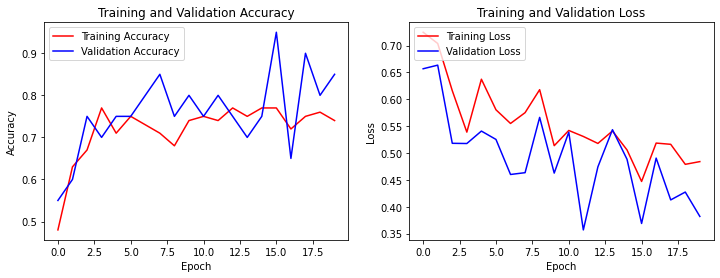

In [27]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12,4)

# Define accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Define loss
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Plotting accuracy
ax[0].plot(epochs, acc, 'r', label='Training Accuracy')
ax[0].plot(epochs, val_acc, 'b', label='Validation Accuracy')
ax[0].set_title('Training and Validation Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='upper left')

# Plotting loss 
ax[1].plot(epochs, loss, 'r', label='Training Loss')
ax[1].plot(epochs, val_loss, 'b', label='Validation Loss')
ax[1].set_title('Training and Validation Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='upper left')

plt.show()

Modul dibawah berfungsi untu memprocessing image dan memvisualisasikannya lewat gambar dengan resolusi 150x150. library file berfungsi mengupload file gambar ke google colab.

In [54]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline


**image.load_img()** berfungsi mereload gambar dengan resolusi 150x150. 

**img_to_array()** merupakan fungsi mengubah objek gambar menjadi array.

**expand_dims()** berfungsi menginsert sebuah axis baru ke dalam array atau menambahkan dimensi pada array.

np.vstack() berfungsi memberikan tumpukan array secara vertikal.

**model_predict(images, batch_size=10)** berfungsi memprediksi gambar yang telah diupload pada model yang sebelumnya telah dibuat.



Saving kotor4.jfif to kotor4.jfif
Saving kotor1.jfif to kotor1.jfif
kotor4.jfif
[[1.]]
messy
kotor1.jfif
[[1.]]
messy


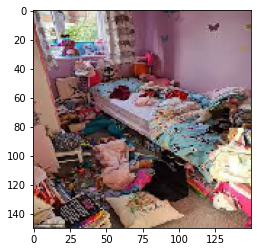

In [63]:
uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150,150))

  imgplot=plt.imshow(img)
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images=np.vstack([x])

  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)
  if classes==1:
    print('messy')
  else:
    print('clean')  

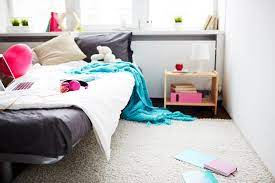

Jika kita mencetak variabel **classes** atau model hasil prediksi maka kita akan mendapatkan gambar **messy bedroom** bernilai **1** sedangkan gambar **clean** akan mendapat nilai **0**. sehingga kita mengganti nilai dari kondisi yaitu **if classes==1:** akan menghasilkan** messy** jika tidak maka **clean**.

Saving kotor6.jfif to kotor6.jfif
Saving kotor5.jfif to kotor5.jfif
kotor6.jfif
[[0.]]
clean
kotor5.jfif
[[0.]]
clean


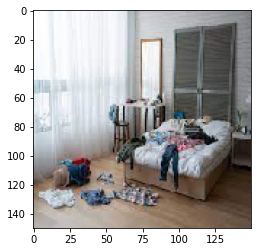

In [61]:
uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150,150))

  imgplot=plt.imshow(img)
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images=np.vstack([x])

  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)
  if classes==1:
    print('messy')
  else:
    print('clean')  


Jadi kesimpulan yang nya adalah bahwa hasil prediksi akan akurat jika gambar tidak menggandung dinding yang bewarnah putih atau cerah, karena prediksi akan bias terhadap dinding dibanding objek berantakan pada kamar. ini bisa dibuktikan dengan gambar **kotor5.jfif** dan **kotor6.jfif**.